# 02 Exploratory Data Analysis

Exploratory Data Analysis (EDA) refers to performing visualizations and identifying significant patterns, such as correlated features, missing data, and outliers. EDA’s are also essential for providing hypotheses for why these patterns occur. It most likely won’t appear in your data product, data highlight, or dashboard, but it will help to inform all of these things.

In [1]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2.1 EDA on Stock Data

### 2.1.1 Overview

In [2]:
#Importing stock price YTD
stock_data = pd.read_csv('/Users/user/Documents/Springboard_Data_Science/Capstone_2_Twitter_Sentiment_Analysis/Data/stock_data.csv', encoding='latin-1')
stock_data = stock_data.drop(['Close'], axis=1)
stock_data.head()

,Dates,Time,Open,High,Low,Adj Close,Volume
0,2022-10-03,00:00:00,138.210007,143.070007,137.690002,142.214081,114311700
1,2022-10-04,00:00:00,145.029999,146.220001,144.259995,145.858047,87830100
2,2022-10-05,00:00:00,144.070007,147.380005,143.009995,146.157532,79471000
3,2022-10-06,00:00:00,145.809998,147.539993,145.220001,145.189148,68402200
4,2022-10-07,00:00:00,142.539993,143.100006,139.449997,139.857986,85925600


In [3]:
#Before we dive into further manipulation, let's look at the statistics in stock_data & the heat map
#because it can get really messy later on when we add in more columns
stock_data.describe()

,Open,High,Low,Adj Close,Volume
count,20.000000,20.000000,20.000000,20.000000,2.000000e+01
mean,143.653001,146.428501,142.008500,144.357530,8.850982e+07
std,4.107105,4.280018,4.014353,4.611861,2.341888e+07
min,134.990005,140.360001,134.369995,138.110886,6.175830e+07
25%,140.907505,143.092506,138.482506,141.677483,7.485732e+07
50%,143.545006,146.055000,142.074997,143.566841,8.558825e+07
75%,146.154999,148.150005,144.499996,146.374676,9.123265e+07
max,150.960007,157.500000,149.360001,155.482086,1.647624e+08


Heatmap – A heatmap is a 2d representation of data that tells how much a variable is correlated to other variables. It contains values from -1 to 1. Suppose two variables x and y. Let us see the possible causes.

When the correlation between x and y is -1, that means x has a negative correlation with y. It simply means when the value of x increases, the value of y would decrease. The more the value is close to -1, the more will be the negative correlation.

When the correlation between x and y is 0. It means that x and y have no correlation and are independent.

When the correlation between x and y is 1, that means x has a positive correlation with y. Or simply, we can say whenever x increases, y increases too.

<AxesSubplot:>

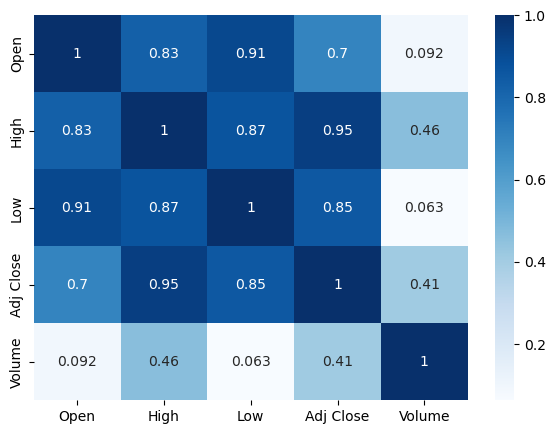

In [4]:
plt.figure(figsize=(7,5))
sns.heatmap(stock_data.corr(),cmap='Blues',annot=True)

From the above heatmap, you can see a large number of 1s and values close to 1. This means those variables show high positive correlations and are interrelated. This might be possible because of the comparatively very small difference between those values. However, in-stock market this small value is what makes the difference. So, what we are going to do, is add new variables to our dataset that represents the difference between those values

### 2.1.2 Data Manipulation

In the following cells, we will examine the change in price between a given date and its next day's pricing (one period into the future) using the function .shift(). For example, "shifted_Open" implicates the next day's opening price for current date. From there, we will be able to find the percentage change of AAPL opening price.

In [5]:
#Creating duplicate 
eda_stock_data = stock_data.copy()

#Shifting Opening price
eda_stock_data['shifted_Open'] = eda_stock_data.Open.shift()

#Shifting High price
eda_stock_data['shifted_High'] = eda_stock_data.High.shift()

#Shifting Low price
eda_stock_data['shifted_Low'] = eda_stock_data.Low.shift()

#Shifting Adjusted closing price
eda_stock_data['shifted_Close'] = eda_stock_data['Adj Close'].shift()

#Shifting Volume
eda_stock_data['shifted_Volume'] = eda_stock_data.Volume.shift()

eda_stock_data.head()

,Dates,Time,Open,High,Low,Adj Close,Volume,shifted_Open,shifted_High,shifted_Low,shifted_Close,shifted_Volume
0,2022-10-03,00:00:00,138.210007,143.070007,137.690002,142.214081,114311700,NaN,NaN,NaN,NaN,NaN
1,2022-10-04,00:00:00,145.029999,146.220001,144.259995,145.858047,87830100,138.210007,143.070007,137.690002,142.214081,114311700.0
2,2022-10-05,00:00:00,144.070007,147.380005,143.009995,146.157532,79471000,145.029999,146.220001,144.259995,145.858047,87830100.0
3,2022-10-06,00:00:00,145.809998,147.539993,145.220001,145.189148,68402200,144.070007,147.380005,143.009995,146.157532,79471000.0
4,2022-10-07,00:00:00,142.539993,143.100006,139.449997,139.857986,85925600,145.809998,147.539993,145.220001,145.189148,68402200.0


After we have found the shifted price, we can find the difference in values for those features (x - x(n-1))

In [6]:
#Difference in values for Opening price
eda_stock_data['values_change_Open'] = eda_stock_data.Open.diff()

#Difference in values for High price
eda_stock_data['values_change_High'] = eda_stock_data.High.diff()

#Difference in values for Low price
eda_stock_data['values_change_Low'] = eda_stock_data.Low.diff()

#Difference in values for Adjusted closing price
eda_stock_data['values_change_Close'] = eda_stock_data['Adj Close'].diff()

#Difference in values for Volume
eda_stock_data['values_change_Volume'] = eda_stock_data.Volume.diff()

eda_stock_data.head()

,Dates,Time,Open,High,Low,Adj Close,Volume,shifted_Open,shifted_High,shifted_Low,shifted_Close,shifted_Volume,values_change_Open,values_change_High,values_change_Low,values_change_Close,values_change_Volume
0,2022-10-03,00:00:00,138.210007,143.070007,137.690002,142.214081,114311700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-10-04,00:00:00,145.029999,146.220001,144.259995,145.858047,87830100,138.210007,143.070007,137.690002,142.214081,114311700.0,6.819992,3.149994,6.569992,3.643967,-26481600.0
2,2022-10-05,00:00:00,144.070007,147.380005,143.009995,146.157532,79471000,145.029999,146.220001,144.259995,145.858047,87830100.0,-0.959991,1.160004,-1.250000,0.299484,-8359100.0
3,2022-10-06,00:00:00,145.809998,147.539993,145.220001,145.189148,68402200,144.070007,147.380005,143.009995,146.157532,79471000.0,1.739990,0.159988,2.210007,-0.968384,-11068800.0
4,2022-10-07,00:00:00,142.539993,143.100006,139.449997,139.857986,85925600,145.809998,147.539993,145.220001,145.189148,68402200.0,-3.270004,-4.439987,-5.770004,-5.331161,17523400.0


Now that we have the difference in values from one period to another, we can calculate one period return

In [7]:
#Percentage change for Opening price
eda_stock_data['%_change_Open'] = eda_stock_data.Open.pct_change().mul(100)

#Percentage change for High price
eda_stock_data['%_change_High'] = eda_stock_data.High.pct_change().mul(100)

#Percentage change for Low price
eda_stock_data['%_change_Low'] = eda_stock_data.Low.pct_change().mul(100)

#Percentage change for Adjusted closing price
eda_stock_data['%_change_Close'] = eda_stock_data['Adj Close'].pct_change().mul(100)

#Percentage change for Volume
eda_stock_data['%_change_Volume'] = eda_stock_data.Volume.pct_change().mul(100)

eda_stock_data.head()

,Dates,Time,Open,High,Low,Adj Close,Volume,shifted_Open,shifted_High,shifted_Low,...,values_change_Open,values_change_High,values_change_Low,values_change_Close,values_change_Volume,%_change_Open,%_change_High,%_change_Low,%_change_Close,%_change_Volume
0,2022-10-03,00:00:00,138.210007,143.070007,137.690002,142.214081,114311700,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-10-04,00:00:00,145.029999,146.220001,144.259995,145.858047,87830100,138.210007,143.070007,137.690002,...,6.819992,3.149994,6.569992,3.643967,-26481600.0,4.934514,2.201715,4.771583,2.562311,-23.166133
2,2022-10-05,00:00:00,144.070007,147.380005,143.009995,146.157532,79471000,145.029999,146.220001,144.259995,...,-0.959991,1.160004,-1.250000,0.299484,-8359100.0,-0.661926,0.793328,-0.866491,0.205326,-9.517352
3,2022-10-06,00:00:00,145.809998,147.539993,145.220001,145.189148,68402200,144.070007,147.380005,143.009995,...,1.739990,0.159988,2.210007,-0.968384,-11068800.0,1.207739,0.108555,1.545351,-0.662562,-13.928100
4,2022-10-07,00:00:00,142.539993,143.100006,139.449997,139.857986,85925600,145.809998,147.539993,145.220001,...,-3.270004,-4.439987,-5.770004,-5.331161,17523400.0,-2.242648,-3.009345,-3.973285,-3.671873,25.618182


We have added 15 new entries to our dataset. We can now create a heatmap with these new values and see their inter-correlation.

From the previous heatmap, we could realize that the original fields (Open, High, Low, Adj. Close, & Volume) aren’t very useful. So for more clarity, we will drop some of those values and take only the significant values for creating the heatmap.

<AxesSubplot:>

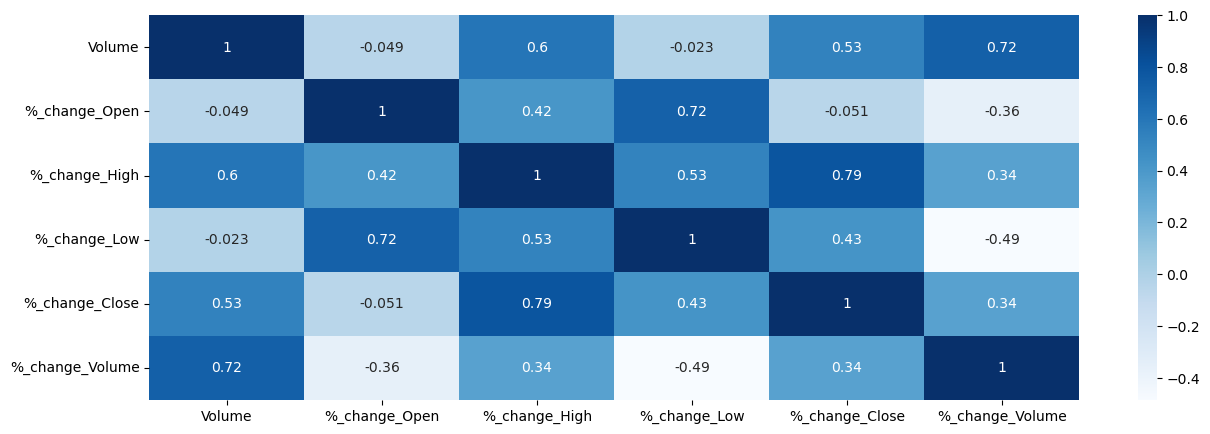

In [8]:
eda_stock_data = eda_stock_data.drop(['Open','High','Low', 'Adj Close', 
                                      'shifted_Open', 'shifted_High', 'shifted_Low', 'shifted_Close',
                                     'shifted_Volume', 'values_change_Open', 'values_change_High', 
                                      'values_change_Low', 'values_change_Close', 'values_change_Volume'],axis=1)
plt.figure(figsize=(15,5))
sns.heatmap(eda_stock_data.corr(),cmap='Blues',annot=True)

The main variable we are going to focus on in this dataset is the ‘Volume’. Variables having a large correlation value with volume represent that those numbers might have intrigued a large number of buyers and sellers. Correlation between those features and the volume feature will tell us how a change in that feature impacts the number of stocks traded that day.

The %_change_Volume shows the most positive correlation with the volume feature. This means that the greater the difference between the volume of the stock today and the volume of the stock price of yesterday, the greater will be the stocks traded that day. As there is no information about the number of buyers and sellers, we can only guess that a high difference in volume might attract more buyers. Whereas a fewer difference may attract more sellers.

## 2.2 EDA on Tweets

In [11]:
tweets_data = pd.read_csv('tweets_data.csv', lineterminator='\n', error_bad_lines=False);

/var/folders/v3/zfqmnfxs5z3dkfs5cn70l8bh0000gn/T/ipykernel_3277/484257973.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  tweets_data = pd.read_csv('tweets_data.csv', lineterminator='\n', error_bad_lines=False);
b'Skipping line 50105: expected 9 fields, saw 12\n'
b'Skipping line 180341: expected 9 fields, saw 10\n'
b'Skipping line 341775: expected 9 fields, saw 10\n'
b'Skipping line 413360: expected 9 fields, saw 10\n'
/var/folders/v3/zfqmnfxs5z3dkfs5cn70l8bh0000gn/T/ipykernel_3277/484257973.py:1: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_data = pd.read_csv('tweets_data.csv', lineterminator='\n', error_bad_lines=False);


In [12]:
tweets_data.head()

,Dates,Time,user,likes,source,text,Subjectivity,Polarity,Analysis
0,<<<<<<< HEAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,=======,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,<<<<<<< HEAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,<<<<<<< HEAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,=======,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
tweets_data[tweets_data.isna().any(axis=1)]

In [ ]:
tweets_data.dropna(inplace=True)